# Exploratory analysis

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

import pydotplus
from IPython.display import Image

In [2]:
# Import csv file with tweets for elon musk
file_name='final_data_frame.csv'
file_path=Path(f"../Resources/{file_name}")
tweets_df = pd.read_csv(file_path, parse_dates=True, infer_datetime_format=True)
tweets_df.rename(columns={'Unnamed: 0': 'date' }, inplace=True)
tweets_df.set_index('date', inplace=True)
tweets_df.head()

,TSLA,QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,4.778,39.031284,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-06-30,4.766,38.437302,0.012707,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-01,4.392,38.329292,-0.075662,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-02,3.840,38.221321,-0.122866,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-06,3.222,38.338306,-0.163998,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
tweets_df.columns

Index(['TSLA', 'QQQ', 'Y_d1_pr_change_diff', 'Y_d5_pr_change_diff',
       'quarterly report announcement flag', 'tweet count', 'number likes',
       'number replies', 'number retweets clean', 'compound', 'positive',
       'negative', 'neutral', 'sentiment', 'model 3', 'coming soon',
       'next week', 'next year', 'falcon 9', 'falcon heavy', 'model x',
       'next month', 'space station', 'sustainable energy', 'electric car',
       'climate change', 'software update', 'dual motor', 'self-driving',
       'giga berlin', 'solar power', 'launch', 'production', 'starship',
       'mars', 'time', 'rocket', 'engine', 'soon', 'tesla', 'spacex',
       'keyword strength', 'keyword flag', 'tweet flag'],
      dtype='object')

In [4]:
tweets_df.iloc[:, 14:41].columns

Index(['model 3', 'coming soon', 'next week', 'next year', 'falcon 9',
       'falcon heavy', 'model x', 'next month', 'space station',
       'sustainable energy', 'electric car', 'climate change',
       'software update', 'dual motor', 'self-driving', 'giga berlin',
       'solar power', 'launch', 'production', 'starship', 'mars', 'time',
       'rocket', 'engine', 'soon', 'tesla', 'spacex'],
      dtype='object')

In [5]:
tweets_df['positive'].value_counts()

0.000    1373
0.161      11
0.178      10
0.208      10
0.112      10
         ... 
0.086       1
0.357       1
0.548       1
0.540       1
0.289       1
Name: positive, Length: 410, dtype: int64

In [6]:
tweets_df['negative'].value_counts()

0.000    1737
0.054      14
0.049      14
0.058      14
0.057      14
         ... 
0.292       1
0.147       1
0.158       1
0.236       1
0.306       1
Name: negative, Length: 211, dtype: int64

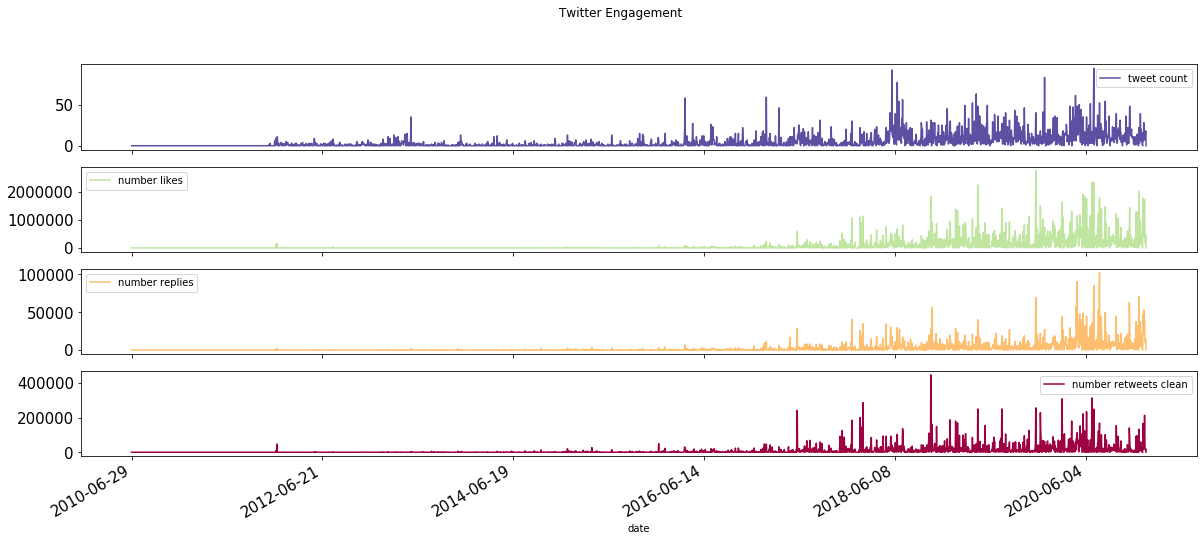

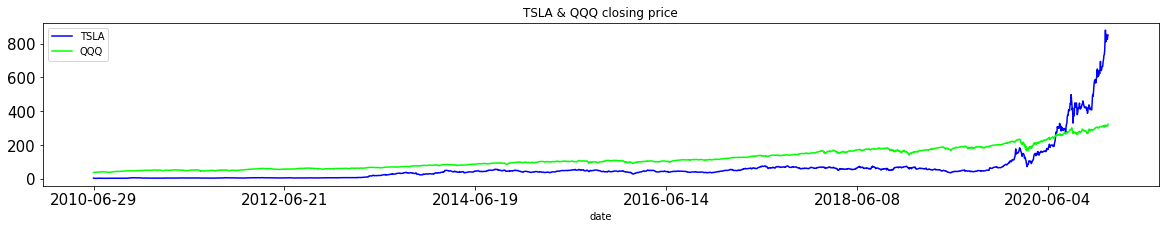

In [7]:
engage_df = tweets_df.iloc[:, 5:9]
engage_df.plot(figsize=(20,8), fontsize=15, subplots=True, colormap='Spectral_r', title="Twitter Engagement")
stock_df1 = tweets_df[['TSLA', 'QQQ']]
stock_df1.plot(figsize=(20,3), title = "TSLA & QQQ closing price", colormap='brg', fontsize=15)

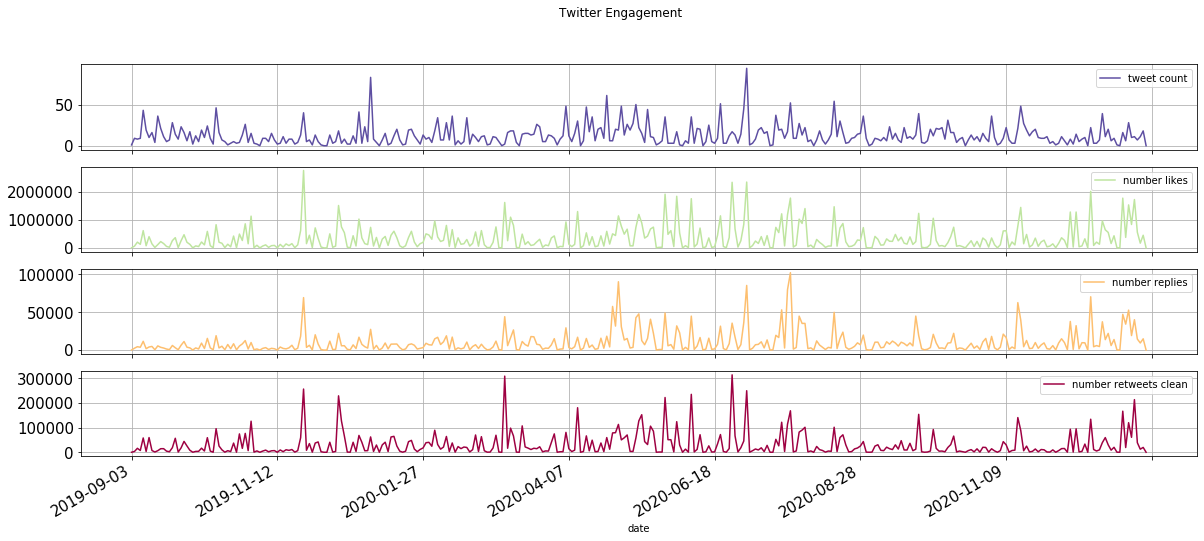

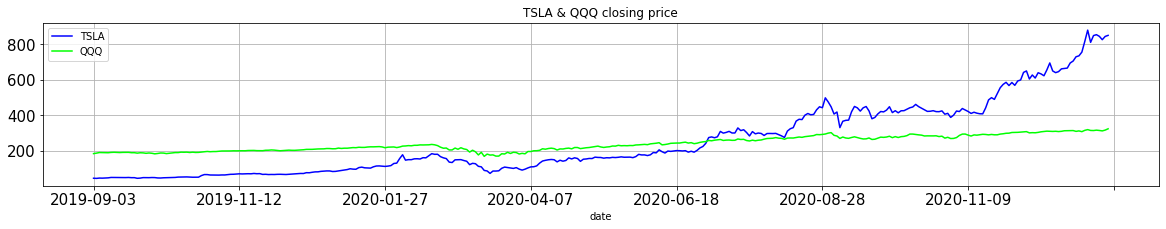

In [8]:
engage_df['2019-09-01':].plot(figsize=(20,8), title = "Twitter Engagement",
                             colormap='Spectral_r', fontsize=15, subplots=True, grid=True)
stock_df1['2019-09-01':].plot(figsize=(20,3), title="TSLA & QQQ closing price", colormap='brg', fontsize=15, grid=True)

In [9]:
sent_df = tweets_df[['compound', 'positive','negative', 'neutral', 'TSLA','QQQ']]
sent_df

,compound,positive,negative,neutral,TSLA,QQQ
date,,,,,,
2010-06-29,0.0000,0.000,0.000,0.000,4.778000,39.031284
2010-06-30,0.0000,0.000,0.000,0.000,4.766000,38.437302
2010-07-01,0.0000,0.000,0.000,0.000,4.392000,38.329292
2010-07-02,0.0000,0.000,0.000,0.000,3.840000,38.221321
2010-07-06,0.0000,0.000,0.000,0.000,3.222000,38.338306
...,...,...,...,...,...,...
2021-01-13,0.5226,0.141,0.090,0.769,854.409973,316.040009
2021-01-14,0.9357,0.336,0.120,0.545,845.000000,314.350006
2021-01-15,0.9429,0.182,0.000,0.818,826.159973,311.859985


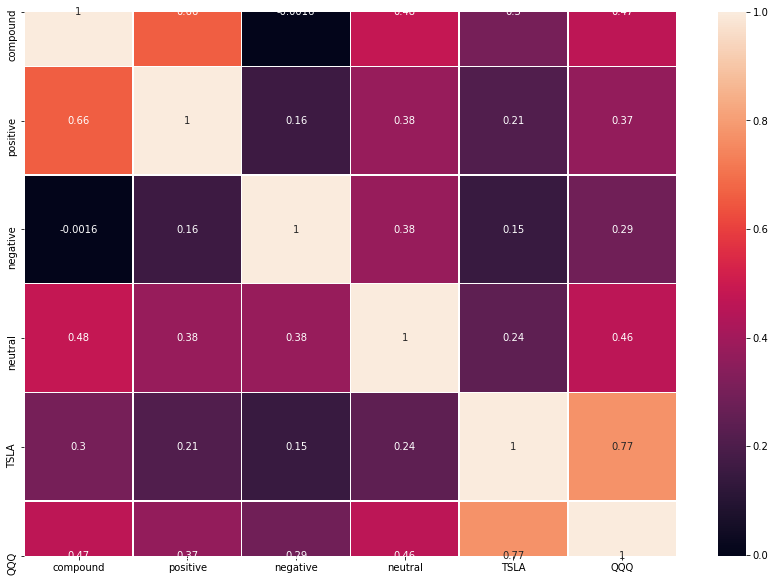

In [10]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(15, 10))  
sns.heatmap(sent_df.corr(), annot=True, linewidth=0.5, ax=ax, square=True)

In [11]:
sent_df1 = tweets_df[['compound','negative', 'positive', 'neutral']]
print(sent_df1.head(3))
stock_df1 = tweets_df[['TSLA', 'QQQ']]
print(stock_df1.head(3))

            compound  negative  positive  neutral
date                                             
2010-06-29       0.0       0.0       0.0      0.0
2010-06-30       0.0       0.0       0.0      0.0
2010-07-01       0.0       0.0       0.0      0.0
             TSLA        QQQ
date                        
2010-06-29  4.778  39.031284
2010-06-30  4.766  38.437302
2010-07-01  4.392  38.329292


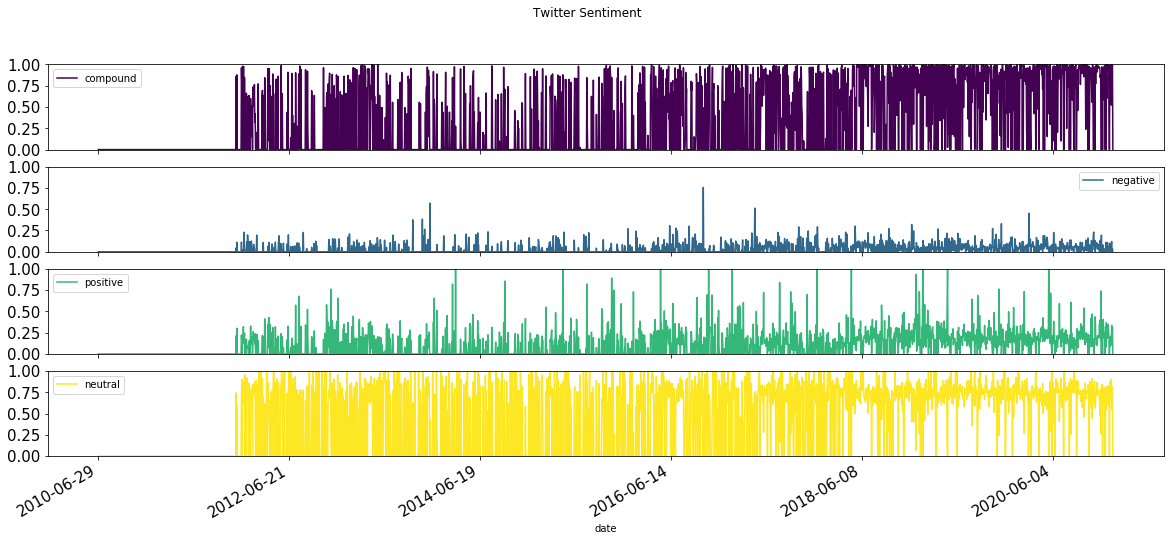

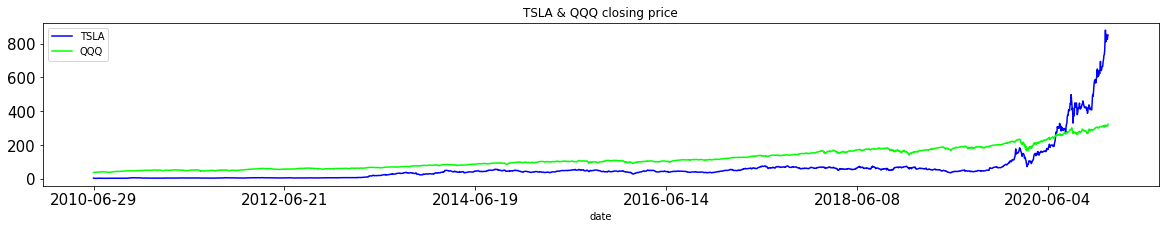

In [12]:
sent_df1.plot(y = ['compound', 'negative', 'positive', 'neutral'], figsize=(20,8), title = "Twitter Sentiment", 
              colormap='viridis', fontsize=15, subplots=True, ylim=(0,1) )
stock_df1.plot(figsize=(20,3), title = "TSLA & QQQ closing price", colormap='brg',fontsize=15)

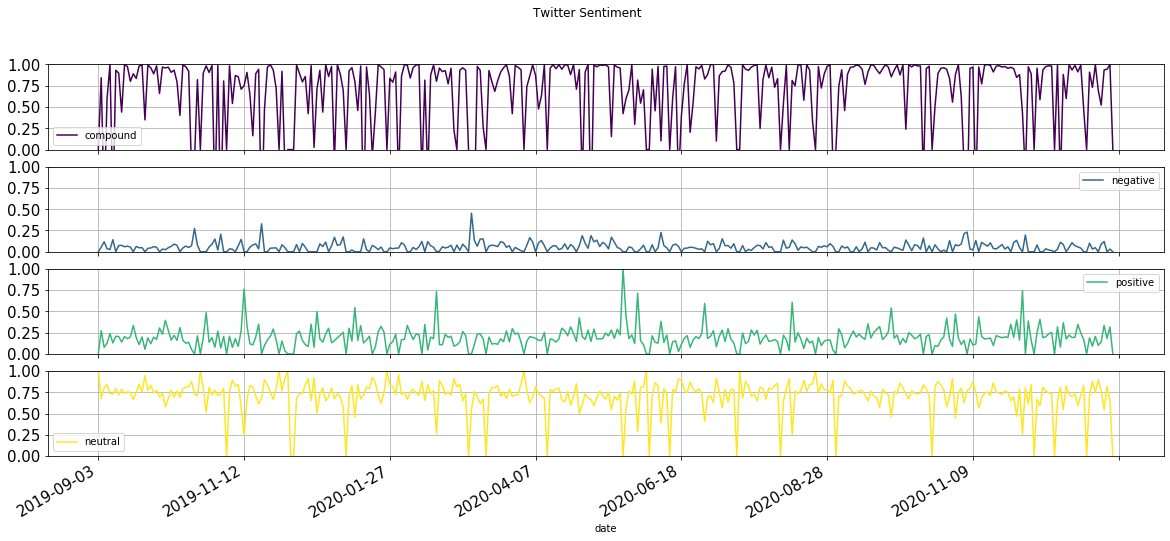

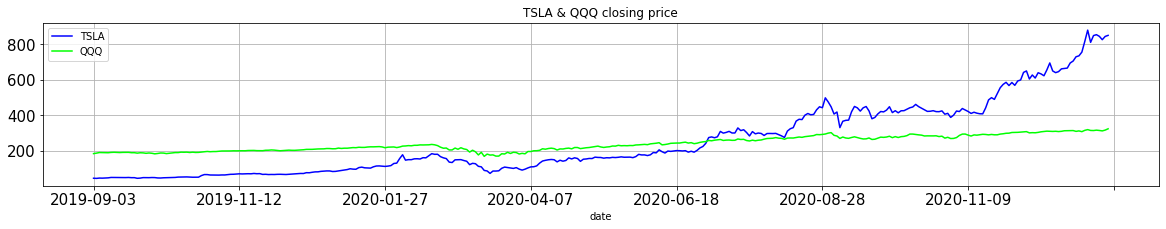

In [13]:
sent_df1['2019-09-01':].plot(y=['compound', 'negative', 'positive', 'neutral'], figsize=(20,8), title = "Twitter Sentiment",
                             colormap='viridis', fontsize=15, subplots=True, grid=True, ylim=(0,1))
stock_df1['2019-09-01':].plot(figsize=(20,3), title="TSLA & QQQ closing price", colormap='brg', fontsize=15, grid=True)

# Random Forests

In [14]:
# Import csv file with tweets for elon musk
file_name='final_data_frame.csv'
file_path=Path(f"../Resources/{file_name}")
tweets_df = pd.read_csv(file_path, parse_dates=True, infer_datetime_format=True)
tweets_df.rename(columns={'Unnamed: 0': 'date' }, inplace=True)
tweets_df.set_index('date', inplace=True)
tweets_df

,TSLA,QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,4.778000,39.031284,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-06-30,4.766000,38.437302,0.012707,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-01,4.392000,38.329292,-0.075662,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-02,3.840000,38.221321,-0.122866,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-06,3.222000,38.338306,-0.163998,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,854.409973,316.040009,-0.000902,0.102563,0.0,11.0,1734427.0,40100.0,213435.0,0.5226,...,1,0,0,1,0,0,1,4,1,1
2021-01-14,845.000000,314.350006,-0.005666,0.037489,0.0,7.0,559632.0,14544.0,38701.0,0.9357,...,1,0,0,0,0,0,0,2,1,1
2021-01-15,826.159973,311.859985,-0.014375,-0.038729,0.0,11.0,169339.0,9381.0,12439.0,0.9429,...,0,0,0,1,0,0,0,1,1,1


In [15]:
tweets_df.head(7)

,TSLA,QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,4.778,39.031284,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-06-30,4.766,38.437302,0.012707,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-01,4.392,38.329292,-0.075662,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-02,3.840,38.221321,-0.122866,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-06,3.222,38.338306,-0.163998,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-07,3.160,39.562256,-0.051168,-0.352239,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2010-07-08,3.492,39.778240,0.099604,-0.302196,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dropped_na_df = tweets_df.iloc[5:, :]
dropped_na_df

,TSLA,QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-07-07,3.160000,39.562256,-0.051168,-0.352239,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-08,3.492000,39.778240,0.099604,-0.302196,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-09,3.480000,40.156231,-0.012939,-0.255315,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-12,3.410000,40.273220,-0.023028,-0.165664,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-13,3.628000,40.795197,0.050969,0.061924,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,854.409973,316.040009,-0.000902,0.102563,0.0,11.0,1734427.0,40100.0,213435.0,0.5226,...,1,0,0,1,0,0,1,4,1,1
2021-01-14,845.000000,314.350006,-0.005666,0.037489,0.0,7.0,559632.0,14544.0,38701.0,0.9357,...,1,0,0,0,0,0,0,2,1,1
2021-01-15,826.159973,311.859985,-0.014375,-0.038729,0.0,11.0,169339.0,9381.0,12439.0,0.9429,...,0,0,0,1,0,0,0,1,1,1


In [17]:
# Define features set
X = dropped_na_df.copy()
X = dropped_na_df.iloc[:, 4:]
X.head()

,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,positive,negative,neutral,sentiment,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X.columns

Index(['quarterly report announcement flag', 'tweet count', 'number likes',
       'number replies', 'number retweets clean', 'compound', 'positive',
       'negative', 'neutral', 'sentiment', 'model 3', 'coming soon',
       'next week', 'next year', 'falcon 9', 'falcon heavy', 'model x',
       'next month', 'space station', 'sustainable energy', 'electric car',
       'climate change', 'software update', 'dual motor', 'self-driving',
       'giga berlin', 'solar power', 'launch', 'production', 'starship',
       'mars', 'time', 'rocket', 'engine', 'soon', 'tesla', 'spacex',
       'keyword strength', 'keyword flag', 'tweet flag'],
      dtype='object')

In [19]:
# Define target vector
#y = tweets_df["col"].values.reshape(-1, 1)
y = dropped_na_df["Y_d5_pr_change_diff"].ravel()
y

array([-0.35223912, -0.30219645, -0.2553146 , ..., -0.03872879,
        0.03479567, -0.03018831])

In [20]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# only `X_train` and `X_testing` DataFrames should be scaled
# Creating StandardScaler instance
scaler = StandardScaler()

In [22]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
X_scaler

StandardScaler()

In [23]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_scaled = X_scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
1,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
2,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
3,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
4,-0.123718,-0.514269,-0.354280,-0.327611,-0.338233,-0.680971,-0.716086,-0.524356,-1.099535,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,-0.600481,-0.826793,-1.156903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,-0.123718,0.743113,7.069661,5.130107,7.511413,0.485031,0.237406,1.042701,0.847175,-0.152106,...,4.393873,-0.36681,-0.302667,3.553890,-0.292664,-0.508623,3.814037,1.573157,1.209492,0.864376
2650,-0.123718,0.285883,2.041136,1.651866,1.085101,1.406721,1.556066,1.565054,0.280123,-0.152106,...,4.393873,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,0.486338,1.209492,0.864376
2651,-0.123718,0.743113,0.370548,0.949168,0.119245,1.422785,0.514663,-0.524356,0.971218,-0.152106,...,-0.227590,-0.36681,-0.302667,3.553890,-0.292664,-0.508623,-0.262189,-0.057072,1.209492,0.864376
2652,-0.123718,1.543265,1.586898,1.694330,0.383897,1.545722,1.420818,0.015408,0.553523,-0.152106,...,-0.227590,-0.36681,-0.302667,-0.281382,-0.292664,-0.508623,-0.262189,0.486338,1.209492,0.864376


## Fitting the Random Forest Model


In [24]:
# Create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500 (?)` and `random_state=72 (?)`.
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [25]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [26]:
# Validate the trained model, by predicting loan defaults using the testing data (`X_test_scaled`).
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([ 3.59387390e-03,  1.05135375e-02,  3.59387390e-03,  1.83724806e-02,
        1.33917320e-02,  3.59387390e-03,  3.59387390e-03,  3.59387390e-03,
        3.59387390e-03,  5.17706878e-02,  4.49361420e-02, -9.32144930e-04,
        3.59387390e-03,  1.06477574e-02,  3.59387390e-03,  3.59387390e-03,
        6.62845577e-03,  3.59387390e-03,  3.59387390e-03,  3.59387390e-03,
        3.59387390e-03,  3.59387390e-03, -1.65082246e-02,  3.59387390e-03,
        3.19329642e-03,  3.59387390e-03,  3.59387390e-03,  1.87516163e-03,
        3.59387390e-03,  9.02287545e-03,  3.59387390e-03,  6.54922038e-02,
        3.59387390e-03,  1.22182847e-02,  3.59387390e-03,  4.65360106e-02,
        9.14894684e-03,  3.59387390e-03,  3.59387390e-03, -4.41958951e-03,
        3.59387390e-03,  3.59387390e-03,  3.59387390e-03,  3.59387390e-03,
       -6.59749628e-03,  3.59387390e-03,  7.00953613e-03,  3.59387390e-03,
        3.59387390e-03,  3.75755157e-03,  8.44233184e-03,  3.59387390e-03,
        3.59387390e-03,  

## Model Evaluation

In [27]:
# Calculating MSE
mse = mean_squared_error(y_test, predictions)
# Displaying results
print(mse)

0.00564117805905732


In [28]:
predictions2 = rf_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, predictions2)
# Displaying results
print(mse)

0.002421640178791245


## Feature Importance

In [29]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [30]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1299463968968181, 'number likes'),
 (0.12228459904994497, 'number retweets clean'),
 (0.11796785346541705, 'number replies'),
 (0.11670817936653537, 'compound'),
 (0.08903348914793531, 'positive'),
 (0.08222923575921433, 'neutral'),
 (0.07064815113826681, 'negative'),
 (0.06612869665287407, 'tweet count'),
 (0.026721951335278247, 'keyword strength'),
 (0.02045353365758266, 'soon'),
 (0.014154997318303993, 'next week'),
 (0.012008971706699378, 'tesla'),
 (0.01165722011952232, 'engine'),
 (0.011215530787644873, 'production'),
 (0.011138836024046188, 'sustainable energy'),
 (0.010397119989198794, 'time'),
 (0.007868752891282913, 'launch'),
 (0.007531990675803026, 'rocket'),
 (0.00723008521150641, 'spacex'),
 (0.007118156377408219, 'starship'),
 (0.005874381228900935, 'mars'),
 (0.005574628739542636, 'coming soon'),
 (0.0054273398051207416, 'giga berlin'),
 (0.005040746883897979, 'self-driving'),
 (0.004833496068155529, 'next year'),
 (0.004208086714330796, 'solar power'),
 (0.00328035

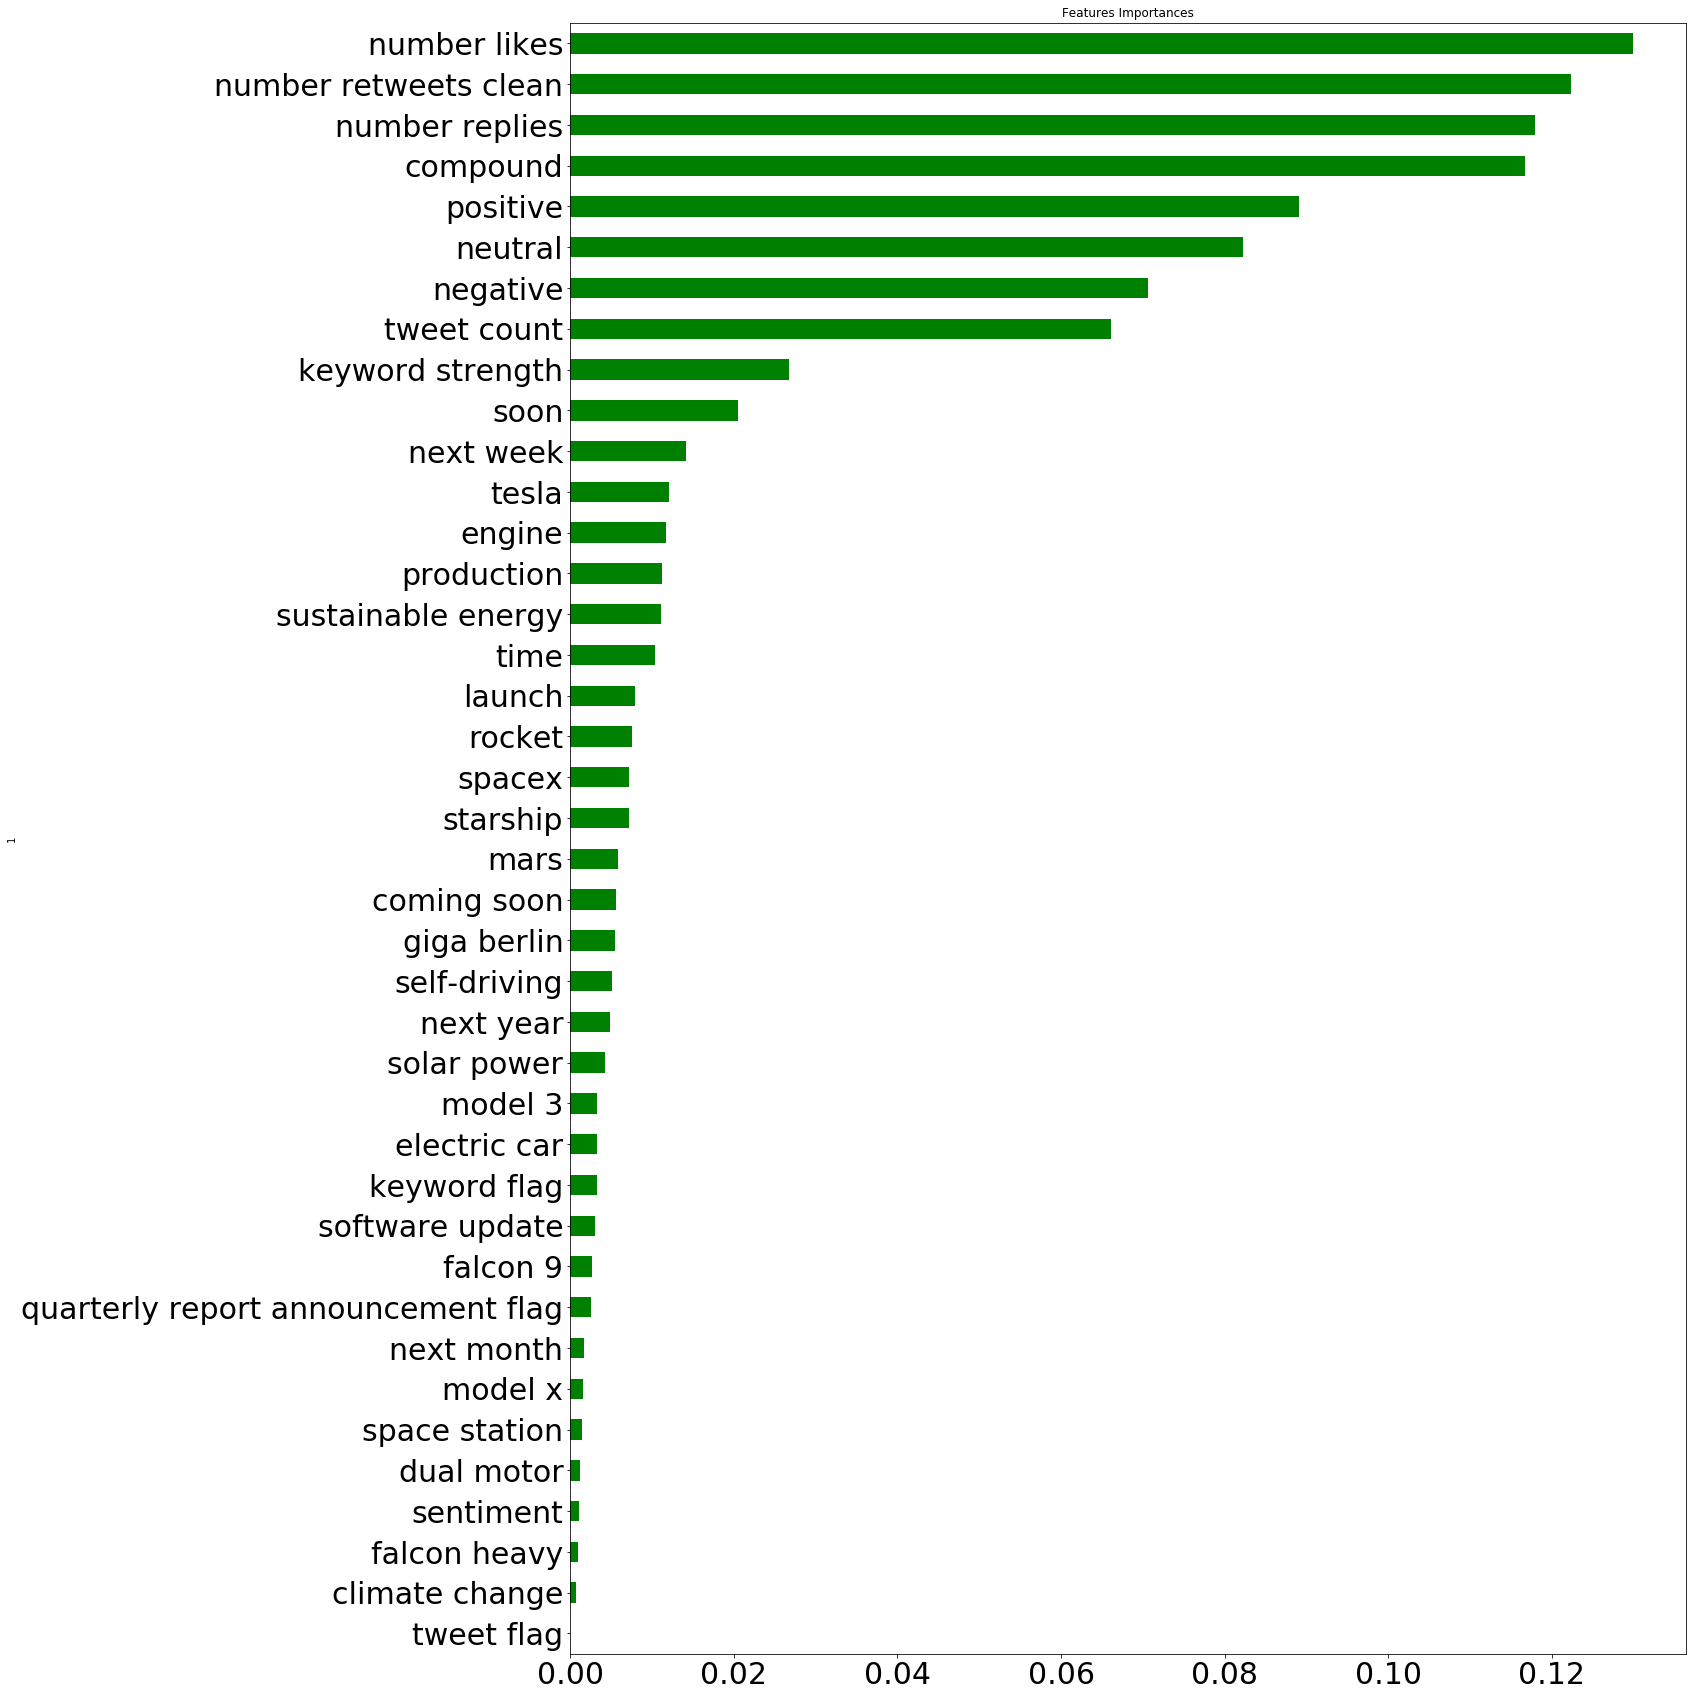

In [31]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Features Importances', 
                        figsize=(20,30), legend=False, fontsize=30)

---

In [32]:
new=pd.DataFrame()
new['y1']=dropped_na_df['Y_d1_pr_change_diff']
new['pct_change_tsla']=dropped_na_df['TSLA'].pct_change()
new['pct_change_qqq']=dropped_na_df['QQQ'].pct_change()
new

,y1,pct_change_tsla,pct_change_qqq
date,,,
2010-07-07,-0.051168,NaN,NaN
2010-07-08,0.099604,0.105063,0.005459
2010-07-09,-0.012939,-0.003436,0.009502
2010-07-12,-0.023028,-0.020115,0.002913
2010-07-13,0.050969,0.063930,0.012961
...,...,...,...
2021-01-13,-0.000902,0.005851,0.006753
2021-01-14,-0.005666,-0.011013,-0.005347
2021-01-15,-0.014375,-0.022296,-0.007921


In [33]:
new['Predicted Return'] = rf_model.predict(X_scaled)
new = new.iloc[1:, :]
new

,y1,pct_change_tsla,pct_change_qqq,Predicted Return
date,,,,
2010-07-08,0.099604,0.105063,0.005459,0.003594
2010-07-09,-0.012939,-0.003436,0.009502,0.003594
2010-07-12,-0.023028,-0.020115,0.002913,0.003594
2010-07-13,0.050969,0.063930,0.012961,0.003594
2010-07-14,0.088641,0.093716,0.005074,0.003594
...,...,...,...,...
2021-01-13,-0.000902,0.005851,0.006753,0.073398
2021-01-14,-0.005666,-0.011013,-0.005347,0.088399
2021-01-15,-0.014375,-0.022296,-0.007921,-0.022006


In [34]:
new['Signal'] = np.where(new['Predicted Return'] > 0.003594, 1.0, 0.0)
new['Signal'].value_counts()

C:\Users\Minyeong\.conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.0    1773
1.0     880
Name: Signal, dtype: int64

In [35]:
new.head()

,y1,pct_change_tsla,pct_change_qqq,Predicted Return,Signal
date,,,,,
2010-07-08,0.099604,0.105063,0.005459,0.003594,0.0
2010-07-09,-0.012939,-0.003436,0.009502,0.003594,0.0
2010-07-12,-0.023028,-0.020115,0.002913,0.003594,0.0
2010-07-13,0.050969,0.063930,0.012961,0.003594,0.0
2010-07-14,0.088641,0.093716,0.005074,0.003594,0.0


In [36]:
# file_name="ML_algo.csv"
# output_file = Path(f"../Resources/{file_name}")
# new.to_csv(f"{output_file}")
